First 5 rows:
           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  

Missing values:
Region                                     14
Date                        

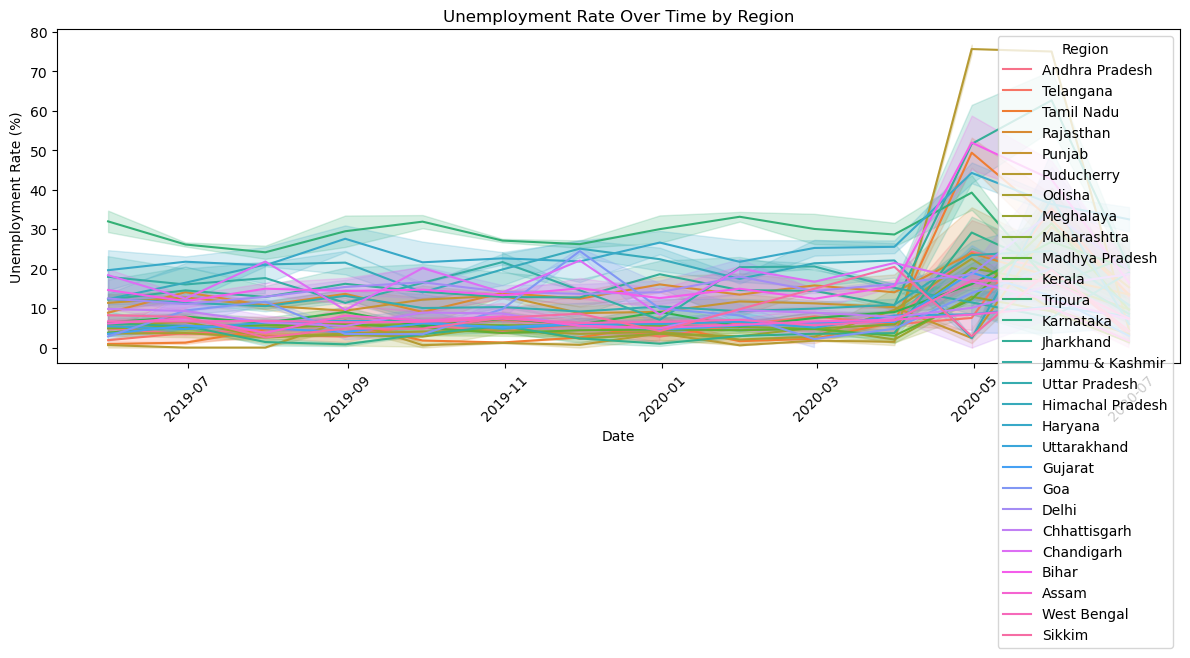

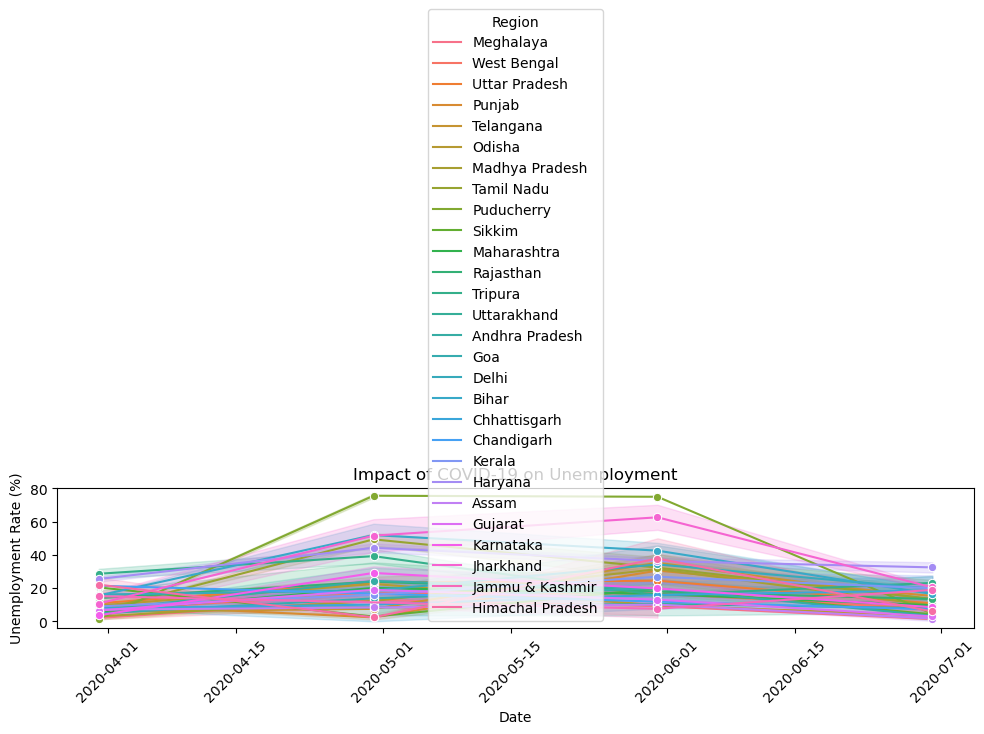

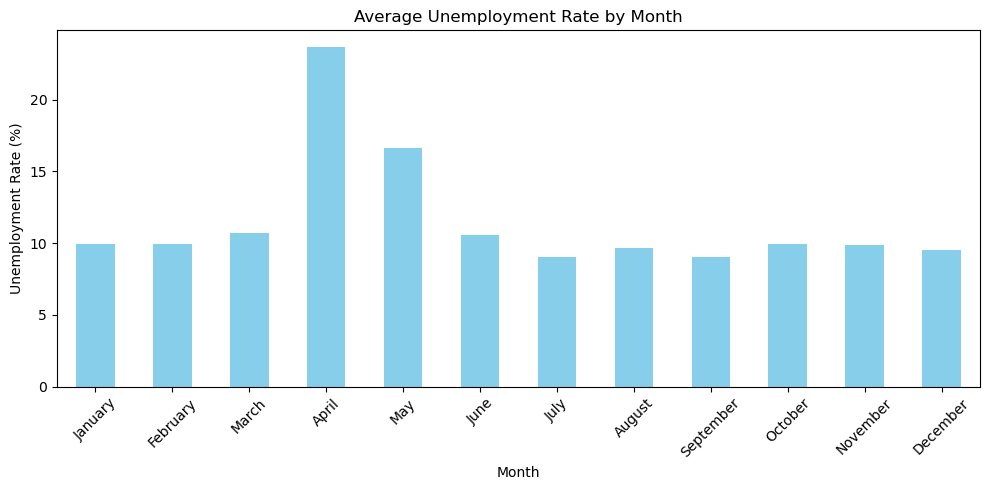

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Unemployment in India.csv") 

print("First 5 rows:")
print(data.head())
print("\nMissing values:")
print(data.isnull().sum())

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Sort data by Date
data = data.sort_values(by='Date')

# Plot Unemployment Rate over time by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize impact of COVID-19 (highlight April-May 2020)
covid_period = data[(data['Date'] >= '2020-03-01') & (data['Date'] <= '2020-06-30')]
plt.figure(figsize=(10, 5))
sns.lineplot(data=covid_period, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker="o")
plt.title('Impact of COVID-19 on Unemployment')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Seasonal trend (month-wise average)
data['Month'] = data['Date'].dt.month_name()
monthly_avg = data.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
